In [2]:
%config IPCompleter.greedy=True
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import unidecode
fig, ax=plt.subplots()
pd.set_option('display.max_columns', None)
import pandas_profiling as pp

In [2]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]}', size=20)
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()
    
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = 'df'
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()
    
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [4]:
df=pd.read_excel('/Users/shivam/Desktop/GL/Capstone/IPL/DataSets/Processed/Summary/All_years_Summary.xlsx')

In [7]:
pp.ProfileReport(df).to_file('/Users/shivam/Desktop/GL/Capstone/IPL/DataSets/Processed/Summary/All_years_Summary_report.html')

In [5]:
pp.ProfileReport(df)

Number of variables,28
Number of observations,76
Total Missing (%),0.0%
Total size in memory,16.7 KiB
Average record size in memory,225.1 B
Numeric,19
Categorical,1
Boolean,1
Date,0
Text (Unique),0
Rejected,7


In [103]:
df.head()

,S.No,Team,Year,RunsScoredHome,OversPlayedHome,RunsConcededHome,OversBowledHome,Top4,HomeBatting,HomeBowling,HomeFielding,HomeWins,RunsConcededAway,OversBowledAway,RunsScoredAway,OversPlayedAway,AwayBatting,AwayBowling,AwayFielding,AwayWins,RunsScored,RunsConceded,OversBowled,OversPlayed,Wins,Batting,Bowling,Fielding
0,1,CSK,2010,164.142857,20.000000,153.857143,18.600000,1,532.000000,533.571429,77.142857,3,172.428571,20.000000,158.428571,19.400000,522.357143,533.928571,72.142857,4,161.285714,163.142857,19.300000,19.700000,7,527.178571,533.750000,74.642857
1,2,DD,2010,172.571429,19.914286,137.285714,18.742857,0,12.000000,149.000000,5.000000,5,159.000000,20.000000,148.428571,19.285714,13.214286,153.428571,6.071429,3,160.500000,148.142857,19.371429,19.600000,8,12.607143,151.214286,5.535714
2,3,KKR,2010,160.857143,20.000000,148.714286,18.571429,0,228.500000,230.500000,35.357143,3,163.285714,20.000000,146.571429,18.385714,297.071429,277.142857,45.000000,3,153.714286,156.000000,19.285714,19.192857,6,262.785714,253.821429,40.178571
3,4,KP,2010,172.714286,20.000000,165.285714,19.342857,0,244.000000,400.785714,65.714286,2,162.285714,19.914286,163.000000,18.485714,257.357143,386.428571,68.928571,6,167.857143,163.785714,19.628571,19.242857,8,250.678571,393.607143,67.321429
4,5,MI,2010,174.571429,20.000000,160.428571,19.128571,1,248.857143,526.714286,51.071429,3,172.428571,20.000000,136.571429,18.600000,215.071429,435.642857,42.500000,2,155.571429,166.428571,19.564286,19.300000,5,231.964286,481.178571,46.785714


In [104]:
df.columns.values

array(['S.No', 'Team', 'Year', 'RunsScoredHome', 'OversPlayedHome',
       'RunsConcededHome', 'OversBowledHome', 'Top4', 'HomeBatting',
       'HomeBowling', 'HomeFielding', 'HomeWins', 'RunsConcededAway',
       'OversBowledAway', 'RunsScoredAway', 'OversPlayedAway',
       'AwayBatting', 'AwayBowling', 'AwayFielding', 'AwayWins',
       'RunsScored', 'RunsConceded', 'OversBowled', 'OversPlayed', 'Wins',
       'Batting', 'Bowling', 'Fielding'], dtype=object)

In [105]:
dfsub=df.loc[:,['Top4','HomeBatting','HomeBowling', 'HomeFielding','AwayBatting', 'AwayBowling', 'AwayFielding']]

In [106]:
dfsub.describe()

,Top4,HomeBatting,HomeBowling,HomeFielding,AwayBatting,AwayBowling,AwayFielding
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,0.473684,490.159649,469.030349,82.107260,489.789591,461.258568,82.218633
std,0.502625,176.638827,163.755038,28.443766,176.250850,155.239857,28.097178
min,0.000000,12.000000,133.714286,5.000000,13.214286,81.714286,6.071429
25%,0.000000,363.017857,346.482143,64.196429,356.046875,370.589286,65.163690
50%,0.000000,484.915179,476.732143,80.647321,488.834821,448.821429,81.093750
75%,1.000000,595.375000,569.696429,97.946429,628.071429,561.446429,96.428571
max,1.000000,915.000000,902.250000,171.785714,922.000000,839.500000,175.357143


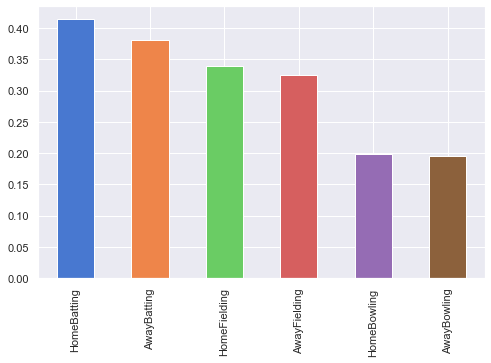

In [107]:
dims = (8, 5)
sns.set(style='darkgrid',palette="muted")
fig, ax=plt.subplots(figsize=dims)
dfsub.corr()['Top4'][1:].sort_values(ascending = False).plot(kind='bar')

In [108]:
dfsub.corr()['Top4']

Top4            1.000000
HomeBatting     0.414132
HomeBowling     0.198367
HomeFielding    0.340080
AwayBatting     0.381199
AwayBowling     0.195893
AwayFielding    0.324850
Name: Top4, dtype: float64

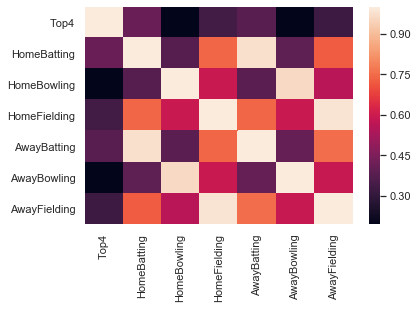

In [109]:
# calculate the correlation matrix
corr = dfsub.corr()
# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

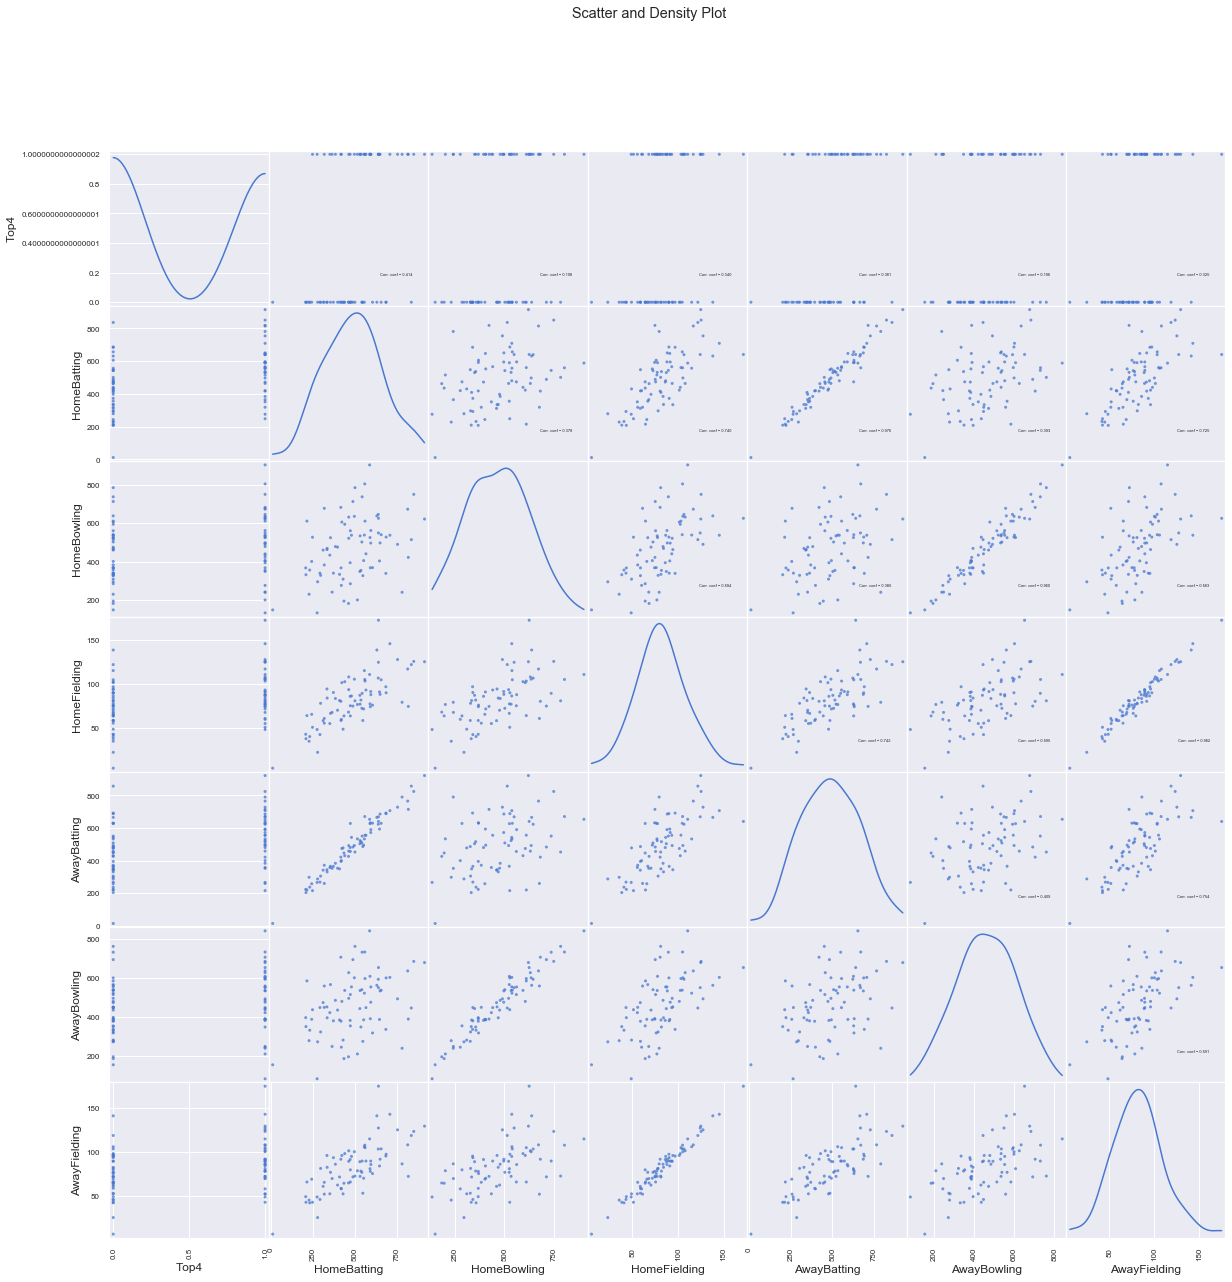

In [110]:
plotScatterMatrix(dfsub, 20, 4)

In [111]:
dfsumm=dfsub.groupby('Top4').mean()
dfsumm['Top4']=dfsumm.index

In [112]:
dfsumm.head()

,HomeBatting,HomeBowling,HomeFielding,AwayBatting,AwayBowling,AwayFielding,Top4
Top4,,,,,,,
0,421.219866,438.417188,72.991071,426.471429,432.599107,73.616815,0
1,566.759408,503.044974,92.236359,560.143105,493.102414,91.776207,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2423a240>,
      dtype=object)

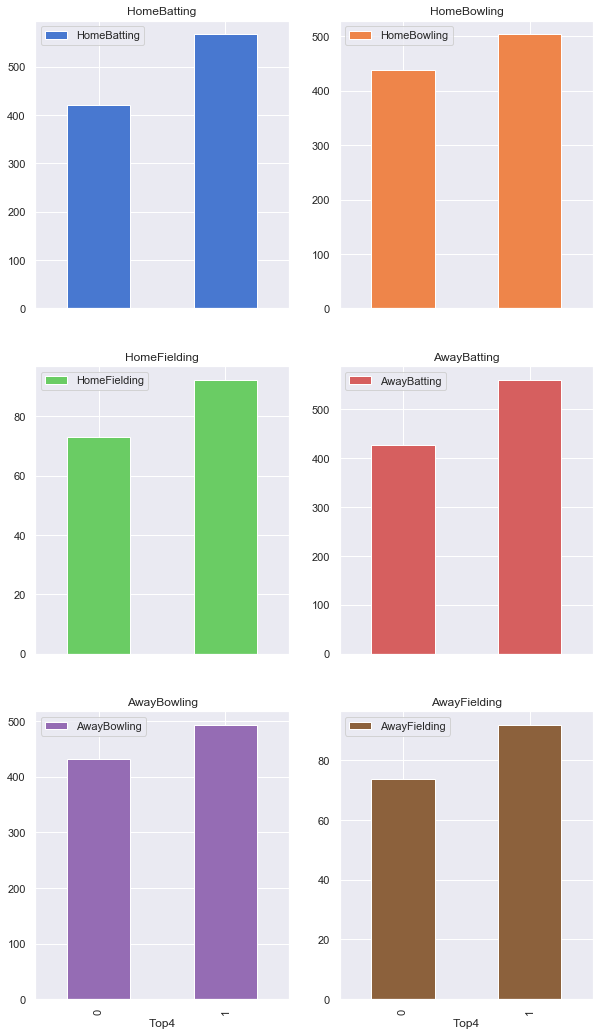

In [113]:
dfsumm.plot(kind='bar',x='Top4',y=dfsumm.columns[:-1],subplots=True,layout=(3,2),figsize=(10,18),xticks=[0,1])

[]

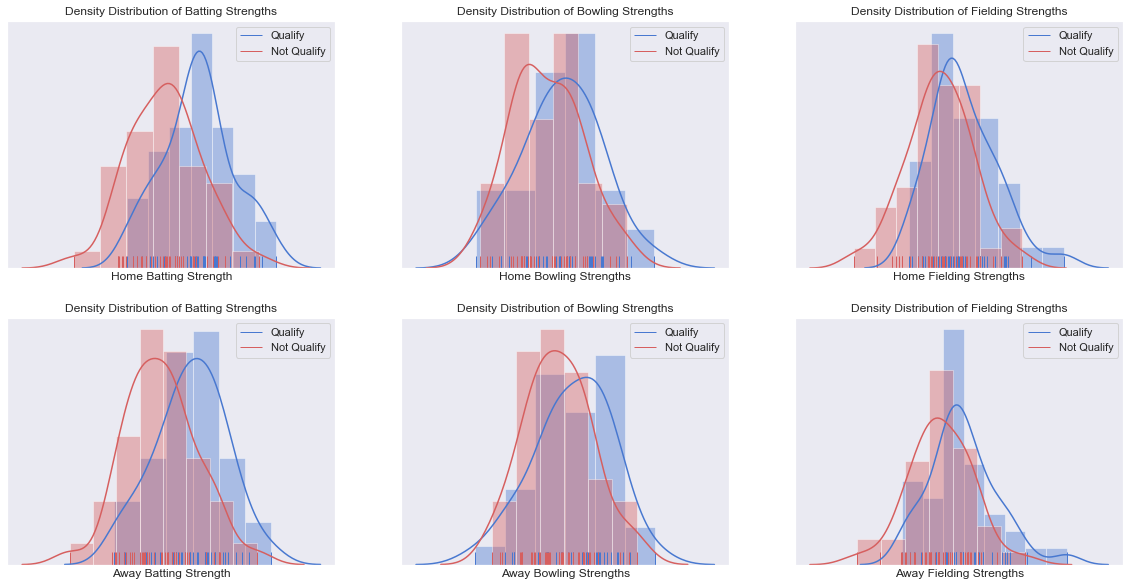

In [114]:
fig, axs=plt.subplots(nrows=2,ncols=3,figsize=(20,10))
sns.distplot(df.HomeBatting[(df['Top4']==1)],color="b",rug=True,ax=axs[0][0])
sns.distplot(df.HomeBatting[(df['Top4']==0)],color="r",rug=True,ax=axs[0][0])
axs[0][0].legend(["Qualify","Not Qualify"],loc='upper right')
axs[0][0].set_xlabel('Home Batting Strength')
axs[0][0].set_title('Density Distribution of Batting Strengths')
axs[0][0].set_yticks([])
axs[0][0].set_xticks([])
########
sns.distplot(df.HomeBowling[(df['Top4']==1)],color="b",rug=True,ax=axs[0][1])
sns.distplot(df.HomeBowling[(df['Top4']==0)],color="r",rug=True,ax=axs[0][1])
axs[0][1].legend(["Qualify","Not Qualify"],loc='upper right')
axs[0][1].set_xlabel('Home Bowling Strengths')
axs[0][1].set_title('Density Distribution of Bowling Strengths')
axs[0][1].set_yticks([])
axs[0][1].set_xticks([])
########
sns.distplot(df.HomeFielding[(df['Top4']==1)],color="b",rug=True,ax=axs[0][2])
sns.distplot(df.HomeFielding[(df['Top4']==0)],color="r",rug=True,ax=axs[0][2])
axs[0][2].legend(["Qualify","Not Qualify"],loc='upper right')
axs[0][2].set_xlabel('Home Fielding Strengths')
axs[0][2].set_title('Density Distribution of Fielding Strengths')
axs[0][2].set_yticks([])
axs[0][2].set_xticks([])
###################
####################
sns.distplot(df.AwayBatting[(df['Top4']==1)],color="b",rug=True,ax=axs[1][0])
sns.distplot(df.AwayBatting[(df['Top4']==0)],color="r",rug=True,ax=axs[1][0])
axs[1][0].legend(["Qualify","Not Qualify"],loc='upper right')
axs[1][0].set_xlabel('Away Batting Strength')
axs[1][0].set_title('Density Distribution of Batting Strengths')
axs[1][0].set_yticks([])
axs[1][0].set_xticks([])
########
sns.distplot(df.AwayBowling[(df['Top4']==1)],color="b",rug=True,ax=axs[1][1])
sns.distplot(df.AwayBowling[(df['Top4']==0)],color="r",rug=True,ax=axs[1][1])
axs[1][1].legend(["Qualify","Not Qualify"],loc='upper right')
axs[1][1].set_xlabel('Away Bowling Strengths')
axs[1][1].set_title('Density Distribution of Bowling Strengths')
axs[1][1].set_yticks([])
axs[1][1].set_xticks([])
########
sns.distplot(df.AwayFielding[(df['Top4']==1)],color="b",rug=True,ax=axs[1][2])
sns.distplot(df.AwayFielding[(df['Top4']==0)],color="r",rug=True,ax=axs[1][2])
axs[1][2].legend(["Qualify","Not Qualify"],loc='upper right')
axs[1][2].set_xlabel('Away Fielding Strengths')
axs[1][2].set_title('Density Distribution of Fielding Strengths')
axs[1][2].set_yticks([])
axs[1][2].set_xticks([])
#the qualifying teams are better in all aspects.

In [115]:
class_freq=np.bincount(df.Top4)
pWin=class_freq[1]/sum(class_freq) #will use it later
print("probabilities top4 finish:")
print("No: "+str(class_freq[0]/sum(class_freq)))
print("Yes: "+str(class_freq[1]/sum(class_freq)))

probabilities top4 finish:
No: 0.5263157894736842
Yes: 0.47368421052631576


In [116]:
def spiderplot(df, indx):
    #taking values out of DF
    values=df.iloc[indx].values.flatten().tolist()
    values+=values[:1]
    #defining colors
    import random
    r = lambda: random.randint(0,255)
    colorRandom = '#%02X%02X%02X' % (r(),r(),r())
    if colorRandom == '#ffffff':colorRandom = '#a5d6a7'
    basic_color = '#37474f'
    color_annotate = '#01579b'
    #spider plot
    from math import pi
    Categories=list(df)[1:]
    N=len(Categories)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    plt.figure(figsize=(7,7))
    ax=plt.subplot(111,projection='polar')
    ax.set_theta_offset(pi/2)
    ax.set_theta_direction(-1)
    plt.xticks(angles[:-1],Categories,color='black',size=17)
    plt.yticks([25,50,75,100],["low","average","good","great"],color=color_annotate, size=10)
    plt.ylim(0,100)
    ax.plot(angles,values,color=basic_color,linewidth=1, linestyle='solid')
    ax.fill(angles,values,color=colorRandom,alpha=.3)
    plt.title(df.index[indx],size=20)
    plt.show()

In [117]:
dfsumm.head()

,HomeBatting,HomeBowling,HomeFielding,AwayBatting,AwayBowling,AwayFielding,Top4
Top4,,,,,,,
0,421.219866,438.417188,72.991071,426.471429,432.599107,73.616815,0
1,566.759408,503.044974,92.236359,560.143105,493.102414,91.776207,1


In [121]:
def spiderplot(data, indx):
    values=data.iloc[indx].values.flatten().tolist()
    values+=values[:1]
    #defining colors
    import random
    r = lambda: random.randint(0,255)
    colorRandom = '#%02X%02X%02X' % (r(),r(),r())
    if colorRandom == '#ffffff':colorRandom = '#a5d6a7'
    basic_color = '#37474f'
    color_annotate = '#01579b'
    #spider plot
    from math import pi
    Categories=list(data)
    N=len(Categories)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    #plotting
    plt.figure(figsize=(7,7))
    ax=plt.subplot(111,projection='polar')
    ax.set_theta_offset(pi/2)
    ax.set_theta_direction(-1)
    plt.xticks(angles[:-1],Categories,color='black',size=17)
    plt.yticks([150,300,450,500],["low","average","good","great"],color=color_annotate, size=10)
    plt.ylim(0,600)
    ax.plot(angles,values,color=basic_color,linewidth=1, linestyle='solid')
    ax.fill(angles,values,color=colorRandom,alpha=.3)
    plt.title(data.index[indx],size=20)
    plt.show()

Non Qualifying Teams performance


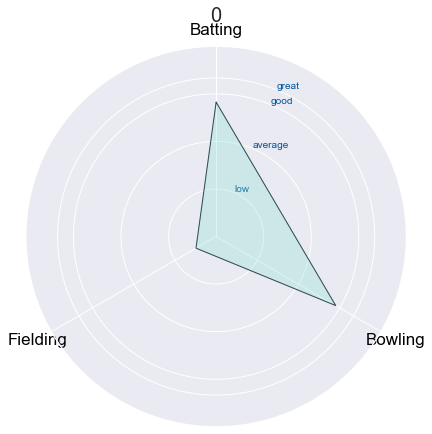

Qualifying Teams performance


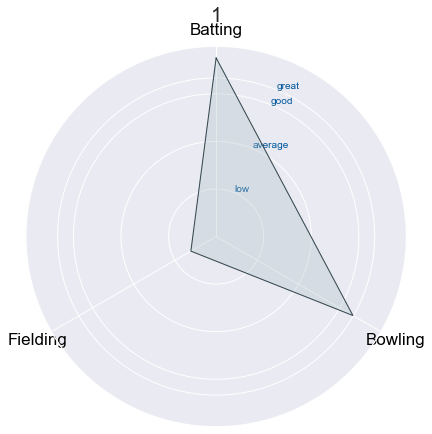

In [122]:
print('Non Qualifying Teams performance')
sdpiderplot(data=df.groupby('Top4').mean().loc[:,['Batting','Bowling','Fielding']],indx=0)
print('Qualifying Teams performance')
sdpiderplot(data=df.groupby('Top4').mean().loc[:,['Batting','Bowling','Fielding']],indx=1)

In [123]:
df.head()

,S.No,Team,Year,RunsScoredHome,OversPlayedHome,RunsConcededHome,OversBowledHome,Top4,HomeBatting,HomeBowling,HomeFielding,HomeWins,RunsConcededAway,OversBowledAway,RunsScoredAway,OversPlayedAway,AwayBatting,AwayBowling,AwayFielding,AwayWins,RunsScored,RunsConceded,OversBowled,OversPlayed,Wins,Batting,Bowling,Fielding
0,1,CSK,2010,164.142857,20.000000,153.857143,18.600000,1,532.000000,533.571429,77.142857,3,172.428571,20.000000,158.428571,19.400000,522.357143,533.928571,72.142857,4,161.285714,163.142857,19.300000,19.700000,7,527.178571,533.750000,74.642857
1,2,DD,2010,172.571429,19.914286,137.285714,18.742857,0,12.000000,149.000000,5.000000,5,159.000000,20.000000,148.428571,19.285714,13.214286,153.428571,6.071429,3,160.500000,148.142857,19.371429,19.600000,8,12.607143,151.214286,5.535714
2,3,KKR,2010,160.857143,20.000000,148.714286,18.571429,0,228.500000,230.500000,35.357143,3,163.285714,20.000000,146.571429,18.385714,297.071429,277.142857,45.000000,3,153.714286,156.000000,19.285714,19.192857,6,262.785714,253.821429,40.178571
3,4,KP,2010,172.714286,20.000000,165.285714,19.342857,0,244.000000,400.785714,65.714286,2,162.285714,19.914286,163.000000,18.485714,257.357143,386.428571,68.928571,6,167.857143,163.785714,19.628571,19.242857,8,250.678571,393.607143,67.321429
4,5,MI,2010,174.571429,20.000000,160.428571,19.128571,1,248.857143,526.714286,51.071429,3,172.428571,20.000000,136.571429,18.600000,215.071429,435.642857,42.500000,2,155.571429,166.428571,19.564286,19.300000,5,231.964286,481.178571,46.785714


Text(0.5, 1.0, 'Runs scored vs conceded')

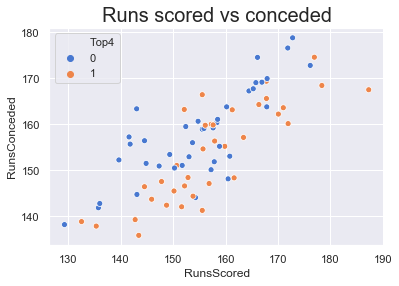

In [142]:
sns.scatterplot(x='RunsScored',y='RunsConceded',hue='Top4',data=df)
plt.title('Runs scored vs conceded',size=20)

Text(0.5, 1.0, 'Growth YoY')

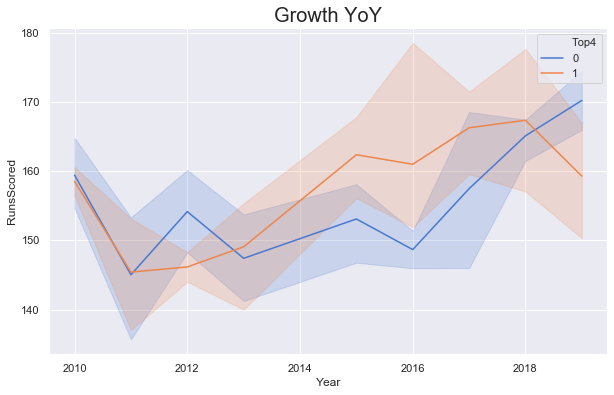

In [141]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year',y='RunsScored',hue='Top4',data=df)
plt.title('Growth YoY',size=20)

Text(0.5, 1.0, 'Avg No of wins per season')

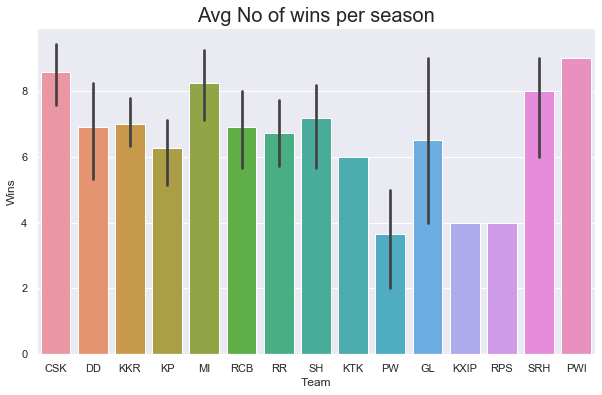

In [140]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Team',y='Wins',data=df)
plt.title('Avg No of wins per season',size=20)

Text(0.5, 1.0, 'No of times qualified')

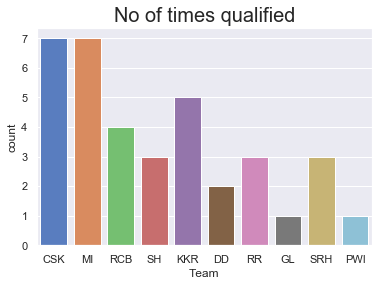

In [135]:
sns.countplot(x='Team',data=df[df.Top4==1])
plt.title('No of times qualified', size=20)